# Name: Gullas Rainer L.

# Section: BSCPE32S3

#Date Perfomred: 04/07/2024

#Date Submitted: 04/11/2024

#Instructor: Engr. Roman Richard

In this activity I used the datasets wine for classification [Wine - UCI](https://https://archive.ics.uci.edu/dataset/109/wine) the problem that is/are being addressed is that people want to know here the origin of their wine or in short where it came from. the second one is the communities and crimes [Communities and Crime - UCI](https://archive.ics.uci.edu/dataset/183/communities+and+crime) the problem that is/are being addressed here is the data combines socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR.



# Classification



In [ ]:
!pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
%matplotlib inline

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

In [ ]:
from ucimlrepo import fetch_ucirepo

wine = fetch_ucirepo(id=109)

X = wine.data.features
y = wine.data.targets

print(wine.metadata)
print(wine.variables)

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [ ]:
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [ ]:
missing_values = X.isnull().sum()

print(missing_values)

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64


In [ ]:
X.sample(5)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
57,13.29,1.97,2.68,16.8,102,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270
60,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680
92,12.69,1.53,2.26,20.7,80,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495
65,12.37,1.21,2.56,18.1,98,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678
88,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680


In [ ]:
X_1 = X.iloc[:, 0].values
y_1 = y["class"].values

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kfold)
print("Cross-validated Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Cross-validated Accuracy: 0.99 (+/- 0.04)
Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [ ]:
print("Shape of X_train_norm:", X_train_norm.shape)
print("Shape of X_test_norm:", X_test_norm.shape)

Shape of X_train_norm: (142, 13)
Shape of X_test_norm: (36, 13)


In [ ]:
from keras.layers import GaussianNoise
input_shape = (X_train_norm.shape[1],)
model = Sequential([
    Dense(10, input_shape=input_shape, activation='relu'),
    GaussianNoise(0.5),
    Dense(3, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_207 (Dense)           (None, 10)                140       
                                                                 
 gaussian_noise_3 (Gaussian  (None, 10)                0         
 Noise)                                                          
                                                                 
 dense_208 (Dense)           (None, 3)                 33        
                                                                 
 dense_209 (Dense)           (None, 1)                 4         
                                                                 
Total params: 177 (708.00 Byte)
Trainable params: 177 (708.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=50)


Epoch 1/50
5/5 [==============================] - 1s 49ms/step - loss: 0.9285 - accuracy: 0.1197 - val_loss: 1.0369 - val_accuracy: 0.0833
Epoch 2/50
5/5 [==============================] - 0s 13ms/step - loss: 1.0702 - accuracy: 0.1549 - val_loss: 0.9520 - val_accuracy: 0.1111
Epoch 3/50
5/5 [==============================] - 0s 14ms/step - loss: 0.9279 - accuracy: 0.1761 - val_loss: 0.8728 - val_accuracy: 0.2222
Epoch 4/50
5/5 [==============================] - 0s 11ms/step - loss: 0.8793 - accuracy: 0.1620 - val_loss: 0.8075 - val_accuracy: 0.2222
Epoch 5/50
5/5 [==============================] - 0s 10ms/step - loss: 0.7653 - accuracy: 0.2183 - val_loss: 0.7440 - val_accuracy: 0.2222
Epoch 6/50
5/5 [==============================] - 0s 9ms/step - loss: 0.5526 - accuracy: 0.2254 - val_loss: 0.6844 - val_accuracy: 0.2500
Epoch 7/50
5/5 [==============================] - 0s 14ms/step - loss: 0.6397 - accuracy: 0.1831 - val_loss: 0.6285 - val_accuracy: 0.2500
Epoch 8/50
5/5 [============

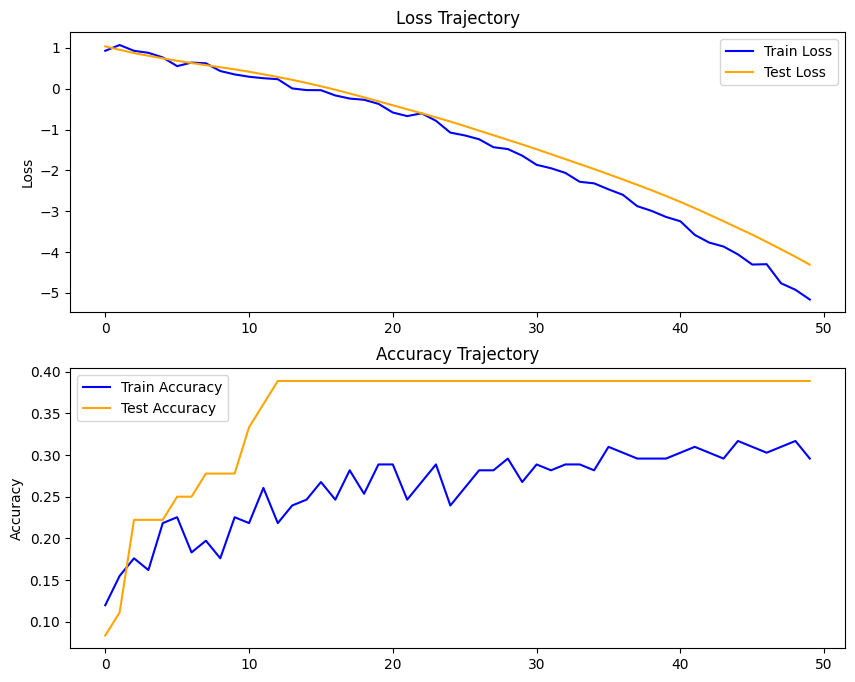

In [ ]:
train_loss = run_hist_1.history['loss']
test_loss = run_hist_1.history['val_loss']
train_accuracy = run_hist_1.history['accuracy']
test_accuracy = run_hist_1.history['val_accuracy']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

axes[1].plot(train_accuracy, label='Train Accuracy', color='blue')
axes[1].plot(test_accuracy, label='Test Accuracy', color='orange')
axes[1].set_title('Accuracy Trajectory')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

axes[0].plot(train_loss, label='Train Loss', color='blue')
axes[0].plot(test_loss, label='Test Loss', color='orange')
axes[0].set_title('Loss Trajectory')
axes[0].set_ylabel('Loss')
axes[0].legend()

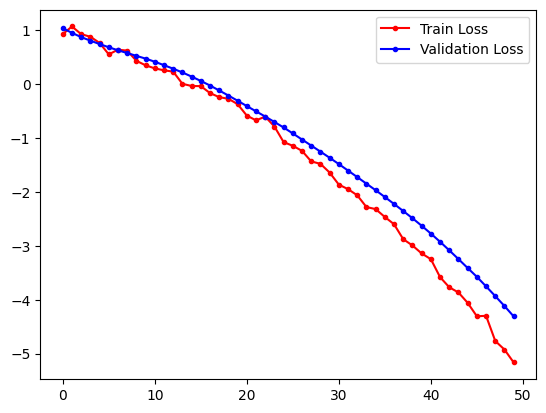

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

# Regression

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split

def get_data():
    communities_and_crime = fetch_ucirepo(id=183)

    X = communities_and_crime.data.features
    y = communities_and_crime.data.targets

    return X, y

def get_combined_data():
    X, y = get_data()
    X.drop(['population'], axis=1, inplace=True)
    combined = pd.concat([X, y], axis=1)

    return combined

combined_data = get_combined_data()
print(combined_data.head())


   state county community        communityname  fold  householdsize  \
0      8      ?         ?         Lakewoodcity     1           0.33   
1     53      ?         ?          Tukwilacity     1           0.16   
2     24      ?         ?         Aberdeentown     1           0.42   
3     34      5     81440  Willingborotownship     1           0.77   
4     42     95      6096    Bethlehemtownship     1           0.55   

   racepctblack  racePctWhite  racePctAsian  racePctHisp  ...  LandArea  \
0          0.02          0.90          0.12         0.17  ...      0.12   
1          0.12          0.74          0.45         0.07  ...      0.02   
2          0.49          0.56          0.17         0.04  ...      0.01   
3          1.00          0.08          0.12         0.10  ...      0.02   
4          0.02          0.95          0.09         0.05  ...      0.04   

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0     0.26            0.20       0.06        

In [ ]:
def get_cols_with_no_nans(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type :
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans
    '''
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

In [ ]:
num_cols = get_cols_with_no_nans(combined_data , 'num')
cat_cols = get_cols_with_no_nans(combined_data , 'no_num')

In [ ]:
print ('Number of numerical columns with no nan values :',len(num_cols))
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))

Number of numerical columns with no nan values : 101
Number of nun-numerical columns with no nan values : 26


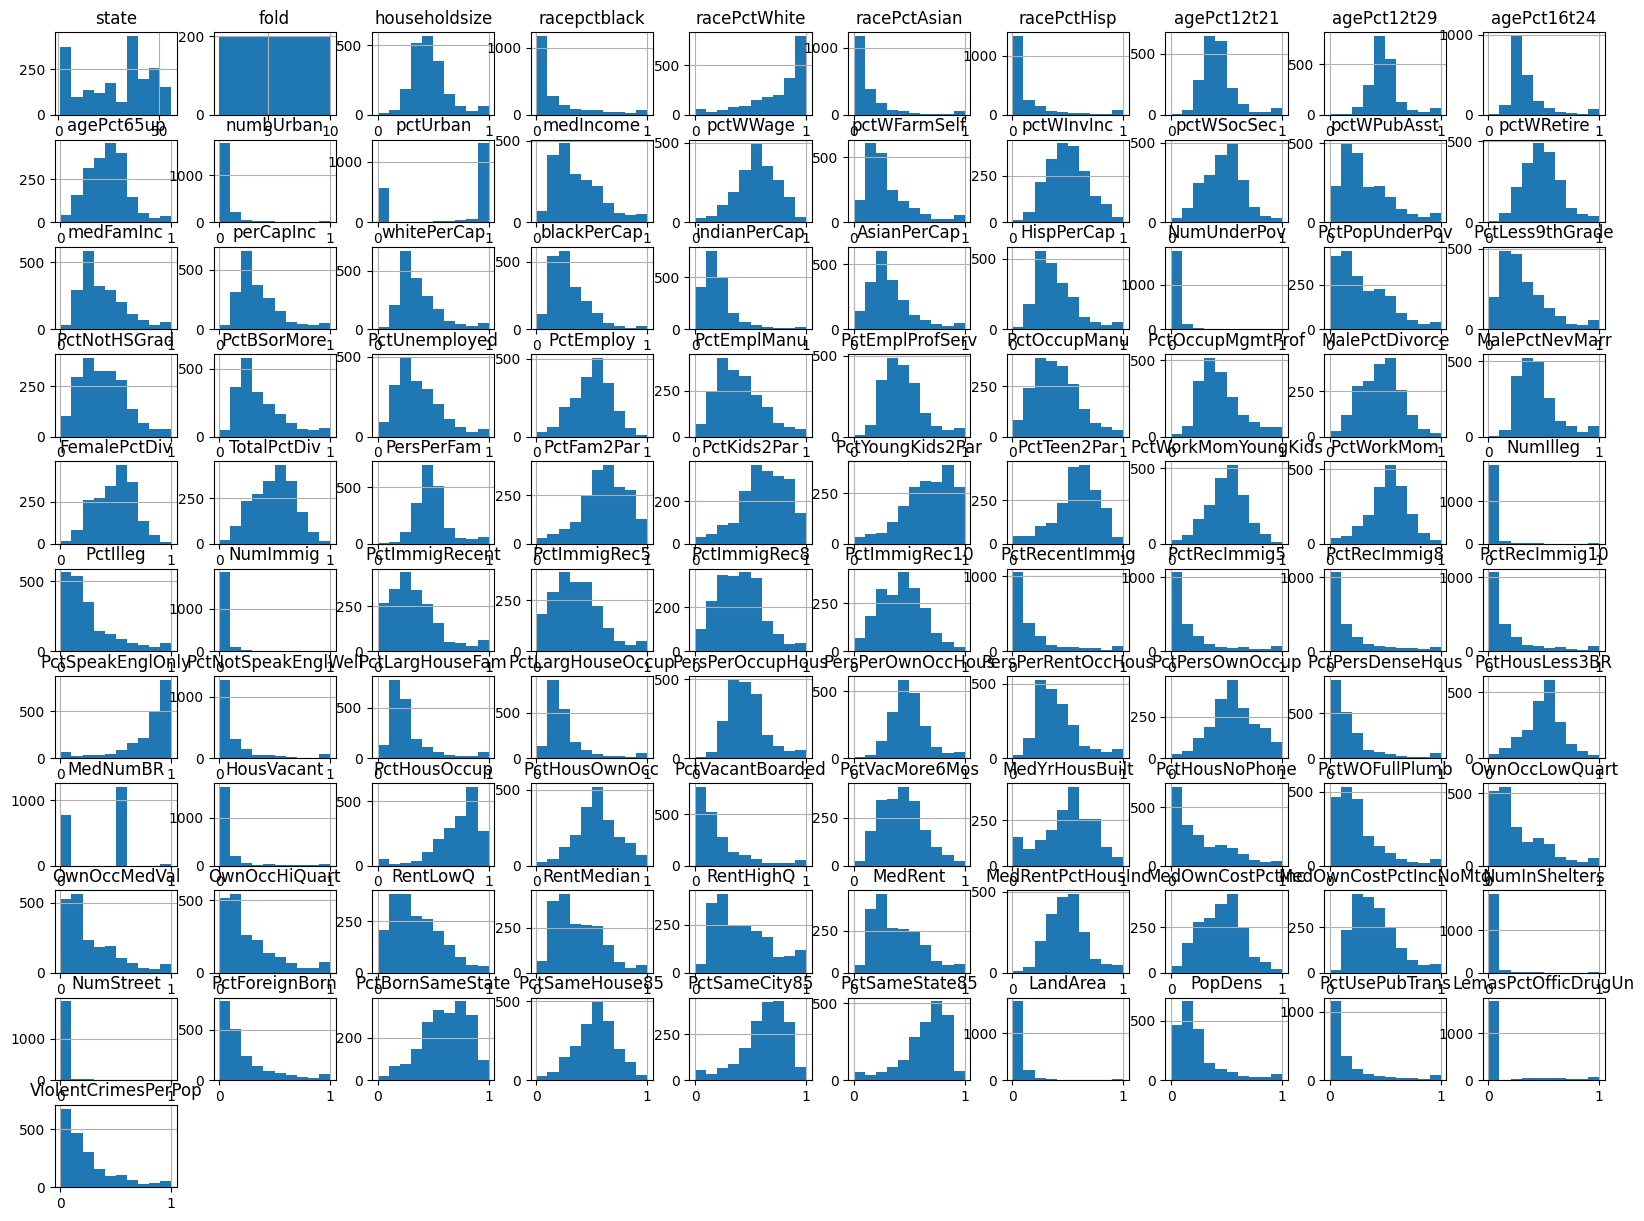

In [ ]:
import matplotlib.pyplot as plt
combined_data = combined_data[num_cols + cat_cols]
combined_data.hist(figsize = (20,15))
plt.show()

In [ ]:
print(combined_data.head())

   state  fold  householdsize  racepctblack  racePctWhite  racePctAsian  \
0      8     1           0.33          0.02          0.90          0.12   
1     53     1           0.16          0.12          0.74          0.45   
2     24     1           0.42          0.49          0.56          0.17   
3     34     1           0.77          1.00          0.08          0.12   
4     42     1           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  ...  PctPolicAsian  \
0         0.17         0.34         0.47         0.29  ...            0.1   
1         0.07         0.26         0.59         0.35  ...              ?   
2         0.04         0.39         0.47         0.28  ...              ?   
3         0.10         0.51         0.50         0.34  ...              ?   
4         0.05         0.38         0.38         0.23  ...              ?   

   PctPolicMinor  OfficAssgnDrugUnits  NumKindsDrugsSeiz  PolicAveOTWorked  \
0       

In [ ]:
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
numeric_features = y.select_dtypes(include=['float64', 'int64']).columns

In [410]:
print("Shape of X_train_norm:", X_train_norm.shape)
print("Shape of X_test_norm:", X_test_norm.shape)

Shape of X_train_norm: (178, 13)
Shape of X_test_norm: (36, 13)


In [411]:
base_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1)  # Output layer with 1 neuron for regression
])

In [412]:
base_model.compile(optimizer='adam', loss='mean_squared_error')

In [413]:
base_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
base_model_loss = base_model.evaluate(X_test, y_test)
print("Base Model Loss:", base_model_loss)

Epoch 1/50
5/5 [==============================] - 1s 82ms/step - loss: 42881.6250 - val_loss: 34040.0586
Epoch 2/50
5/5 [==============================] - 0s 25ms/step - loss: 23412.1172 - val_loss: 17278.7422
Epoch 3/50
5/5 [==============================] - 0s 33ms/step - loss: 11260.1924 - val_loss: 6629.3672
Epoch 4/50
5/5 [==============================] - 0s 29ms/step - loss: 3829.4797 - val_loss: 1610.9077
Epoch 5/50
5/5 [==============================] - 0s 38ms/step - loss: 709.7225 - val_loss: 351.5442
Epoch 6/50
5/5 [==============================] - 0s 41ms/step - loss: 320.5483 - val_loss: 665.7840
Epoch 7/50
5/5 [==============================] - 0s 16ms/step - loss: 750.6833 - val_loss: 1009.4555
Epoch 8/50
5/5 [==============================] - 0s 17ms/step - loss: 937.4267 - val_loss: 905.8844
Epoch 9/50
5/5 [==============================] - 0s 19ms/step - loss: 736.7676 - val_loss: 581.3610
Epoch 10/50
5/5 [==============================] - 0s 31ms/step - loss: 422.6

In [414]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [415]:
improved_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer with 1 neuron for regression
])

In [416]:
improved_model.compile(optimizer='adam', loss='mean_squared_error')

In [418]:
improved_history = improved_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

improved_model_loss = improved_model.evaluate(X_test_scaled, y_test)
print("Improved Model Loss:", improved_model_loss)

Epoch 1/50
5/5 [==============================] - 0s 87ms/step - loss: 0.0121 - val_loss: 0.0487
Epoch 2/50
5/5 [==============================] - 0s 21ms/step - loss: 0.0110 - val_loss: 0.0522
Epoch 3/50
5/5 [==============================] - 0s 20ms/step - loss: 0.0107 - val_loss: 0.0520
Epoch 4/50
5/5 [==============================] - 0s 16ms/step - loss: 0.0103 - val_loss: 0.0514
Epoch 5/50
5/5 [==============================] - 0s 19ms/step - loss: 0.0099 - val_loss: 0.0495
Epoch 6/50
5/5 [==============================] - 0s 38ms/step - loss: 0.0097 - val_loss: 0.0500
Epoch 7/50
5/5 [==============================] - 0s 18ms/step - loss: 0.0091 - val_loss: 0.0530
Epoch 8/50
5/5 [==============================] - 0s 19ms/step - loss: 0.0087 - val_loss: 0.0513
Epoch 9/50
5/5 [==============================] - 0s 29ms/step - loss: 0.0083 - val_loss: 0.0503
Epoch 10/50
5/5 [==============================] - 0s 31ms/step - loss: 0.0082 - val_loss: 0.0501
Epoch 11/50
5/5 [============

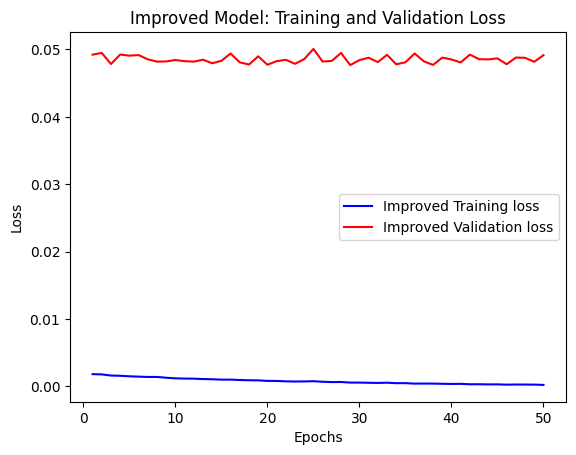

In [420]:
train_loss_improved = improved_history.history['loss']
val_loss_improved = improved_history.history['val_loss']
epochs_improved = range(1, len(train_loss_improved) + 1)

plt.plot(epochs_improved, train_loss_improved, 'b', label='Improved Training loss')
plt.plot(epochs_improved, val_loss_improved, 'r', label='Improved Validation loss')
plt.title('Improved Model: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Conclusion

# In this activity we are tasked to do Classification and Regression for neural networks especially Multilayer Perceptron(MLP). in my understanding this is to show how the difference between the two and how they work. I based mostly of the code from previous activities and some research online especially the K-fold for the classification which is really new to me this activity help me to understand somme of the inner workings of the neural network and MLP on how they view the data ang processed it to evaluate.